# Predictive Modeling of Guest Satisfaction in the Hospitality Industry
**Kenn Wade**  
**DSC 680: Applied Data Science**  
**Bellevue University**  
**September 15th, 2024**

## Dataset Description

The dataset used for this project is sourced from **Kaggle** and contains tourism data compiled by the **OECD**. This dataset includes key tourism metrics such as **total domestic trips**, **overnight visitors (tourists)**, **same-day visitors (excursionists)**, and **nights spent in various types of accommodation** across multiple countries from **2008 to 2021**. 

This data was cleaned, processed, and prepared for predictive modeling to forecast tourism metrics for the year 2021. The preprocessing steps included handling missing values, imputing data with medians, and removing outliers to ensure model accuracy and reliability.

### Dataset Source:
Kaggle. (2024). Tourism - OECD. Retrieved from [https://www.kaggle.com/datasets/zsinghrahulk/tourism-oecd](https://www.kaggle.com/datasets/zsinghrahulk/tourism-oecd)


## Introduction

In this project, I aim to develop a predictive model for **tourism data** from 2008 to 2021, with a focus on metrics like **total domestic trips** and **overnight visitors**. Predicting tourism trends is crucial for government planning, resource allocation, and improving the overall tourism experience. By identifying key patterns and relationships within the data, I aim to provide actionable insights that could help stakeholders in the tourism sector make informed decisions for the future.

## Business Problem

Tourism is a major contributor to many economies, and accurate predictions of tourism patterns are essential for strategic decision-making in the hospitality and travel sectors. This project focuses on **forecasting tourism data** for the year 2021 using historical data. Understanding the drivers of tourism trends can help improve infrastructure planning, optimize resource allocation, and enhance the visitor experience, all of which are vital for economic growth in tourism-dependent regions.

## Data Preparation

I have loaded and cleaned a **tourism dataset** sourced from the **OECD Tourism Statistics**. This dataset includes annual tourism metrics for several countries between 2008 and 2021, such as **total domestic trips**, **overnight visitors**, **same-day visitors**, and **nights spent in various accommodations**. The data was preprocessed by filling missing values, handling encoding issues, and ensuring that all numerical variables were properly formatted. I also removed any duplicates and filled in missing data with appropriate values like medians, ensuring data quality before moving forward with the analysis.

## Exploratory Data Analysis (EDA)

As part of the **Exploratory Data Analysis (EDA)**, I generated a **correlation heatmap** to examine relationships between tourism metrics across different years. The correlation matrix revealed strong positive correlations between metrics, especially between adjacent years, indicating that past data is a strong predictor of future trends. For instance, the correlation between 2020 and 2021 showed a significant relationship, reinforcing the idea that tourism patterns are stable over time. This heatmap helped guide the selection of key features for modeling by highlighting the years and variables most relevant to predicting future tourism patterns.

## Feature Engineering

To improve the predictive power of the model, I maintained key features such as **total domestic trips**, **overnight visitors**, and **nights in accommodation**, and ensured proper scaling and encoding of relevant variables. Additionally, I used correlation insights from the EDA to ensure that the most influential variables were prioritized in the modeling process.

## Model Training

I initially trained a **Linear Regression** model using the prepared dataset to predict tourism metrics for 2021. However, the model struggled to handle the complexity of the data, resulting in a high **Mean Squared Error (MSE)**. To address this, I implemented a more robust model, the **Random Forest Regressor**, which significantly improved prediction accuracy. I also conducted outlier detection and removal, which further reduced the MSE.

After training the **Random Forest Regressor** on the cleaned dataset, I evaluated its performance using **Mean Squared Error (MSE)**. The scatter plot  compares the **predicted vs actual values** for tourism metrics in 2021, showing a strong alignment between predictions and actual outcomes, particularly after outliers were removed. The red line represents the perfect prediction (Actual = Predicted), and while the model captures the general trend, further refinement may be needed for extreme values.

## Visualization of Results

To assess the model’s performance visually, I created several plots, including:
- **Correlation Heatmap**: Showed how different years of tourism data correlated with each other.
- **Actual vs Predicted Scatter Plot**: This plot, as shown above, helps visualize the model’s predictive power by comparing actual 2021 tourism values to the predicted values.

This visualization highlights the effectiveness of the **Random Forest** model, especially after outlier removal, in accurately predicting tourism trends based on historical data.


In [11]:
# Step 1: Load the data with specified encoding
file_path = '/Users/kennwade/Desktop/DSC 680 Applied Data Science/OECD Tourism data DSC 680.csv'
print(f"Loading data from: {file_path}")

# Try different encodings
encodings = ['utf-8', 'latin1', 'ISO-8859-1', 'cp1252']
tourism_data = None

for encoding in encodings:
    try:
        print(f"Trying encoding: {encoding}")
        tourism_data = pd.read_csv(file_path, encoding=encoding, skiprows=1)
        print(f"Successfully loaded with encoding: {encoding}")
        break
    except UnicodeDecodeError as e:
        print(f"Encoding error with {encoding}: {e}")
    except Exception as e:
        print(f"Unexpected error with {encoding}: {e}")

if tourism_data is None:
    raise ValueError("Failed to load the CSV file with all attempted encodings.")

# Preview the first few rows of the loaded data
print("Loaded Tourism Data:")
print(tourism_data.head())


Loading data from: /Users/kennwade/Desktop/DSC 680 Applied Data Science/OECD Tourism data DSC 680.csv
Trying encoding: utf-8
Encoding error with utf-8: 'utf-8' codec can't decode byte 0xfc in position 1: invalid start byte
Trying encoding: latin1
Successfully loaded with encoding: latin1
Loaded Tourism Data:
     Country                              Variable  Unnamed: 2          2008  \
0  Australia                  Total domestic trips         NaN  210,753,700    
1        NaN         Overnight visitors (tourists)         NaN   72,008,700    
2        NaN     Same-day visitors (excursionists)         NaN  138,745,000    
3        NaN  Nights in all types of accommodation         NaN  277,865,400    
4        NaN     Hotels and similar establishments         NaN   75,646,100    

           2009          2010          2011          2012          2013  \
0  215,845,100   225,239,200   233,126,300   248,377,400   240,118,400    
1   67,669,600    69,296,800    71,894,700    74,472,200   

In [12]:
# Step 2: Clean the Data

# Remove any columns that are completely empty
tourism_data.dropna(axis=1, how='all', inplace=True)

# Convert columns to appropriate data types
def clean_and_convert(column):
    if column.dtype == 'object':
        column = column.str.replace(',', '', regex=True)
    return pd.to_numeric(column, errors='coerce')

# Apply conversion to all columns except 'Country' and 'Variable'
for col in tourism_data.columns:
    if col not in ['Country', 'Variable']:
        tourism_data[col] = clean_and_convert(tourism_data[col])

# Print the cleaned data
print("Cleaned Tourism Data:")
print(tourism_data.head())

# Final data types check
print("Final data types:")
print(tourism_data.dtypes)


Cleaned Tourism Data:
     Country                              Variable         2008         2009  \
0  Australia                  Total domestic trips  210753700.0  215845100.0   
1        NaN         Overnight visitors (tourists)   72008700.0   67669600.0   
2        NaN     Same-day visitors (excursionists)  138745000.0  148175500.0   
3        NaN  Nights in all types of accommodation  277865400.0  262235600.0   
4        NaN     Hotels and similar establishments   75646100.0   70740800.0   

          2010         2011         2012         2013         2014  \
0  225239200.0  233126300.0  248377400.0  240118400.0  260362000.0   
1   69296800.0   71894700.0   74472200.0   75796400.0   84480800.0   
2  155942400.0  161231600.0  173905200.0  164322000.0  175881200.0   
3  265393200.0  270573300.0  281732900.0  282679700.0  310532600.0   
4   71929600.0   74367000.0   71529900.0   71977900.0   79604700.0   

          2015         2016         2017         2018         2019  \
0  269

In [13]:
# Step 3: Handle Missing Values

# Fill missing values in 'Country' and 'Variable' columns with forward fill
tourism_data['Country'] = tourism_data['Country'].ffill()
tourism_data['Variable'] = tourism_data['Variable'].ffill()

# Check for any remaining missing values
print("Remaining Missing Values:")
print(tourism_data.isnull().sum())

# Preview the cleaned dataset
print("Cleaned and filled data:")
print(tourism_data.head())


Remaining Missing Values:
Country       0
Variable      0
2008        116
2009        102
2010        102
2011         95
2012         73
2013         76
2014         69
2015         49
2016         52
2017         41
2018         26
2019         29
2020         36
2021         47
dtype: int64
Cleaned and filled data:
     Country                              Variable         2008         2009  \
0  Australia                  Total domestic trips  210753700.0  215845100.0   
1  Australia         Overnight visitors (tourists)   72008700.0   67669600.0   
2  Australia     Same-day visitors (excursionists)  138745000.0  148175500.0   
3  Australia  Nights in all types of accommodation  277865400.0  262235600.0   
4  Australia     Hotels and similar establishments   75646100.0   70740800.0   

          2010         2011         2012         2013         2014  \
0  225239200.0  233126300.0  248377400.0  240118400.0  260362000.0   
1   69296800.0   71894700.0   74472200.0   75796400.0   844

In [14]:
# Step 4: Fill remaining missing values in numerical columns with the median

# For numeric columns, fill missing values with the median of each column
numeric_columns = tourism_data.columns[2:]
tourism_data[numeric_columns] = tourism_data[numeric_columns].apply(lambda x: x.fillna(x.median()))

# Check if there are any remaining missing values
print("Remaining Missing Values after filling with median:")
print(tourism_data.isnull().sum())

# Preview the final cleaned dataset
print("Final cleaned data:")
print(tourism_data.head())


Remaining Missing Values after filling with median:
Country     0
Variable    0
2008        0
2009        0
2010        0
2011        0
2012        0
2013        0
2014        0
2015        0
2016        0
2017        0
2018        0
2019        0
2020        0
2021        0
dtype: int64
Final cleaned data:
     Country                              Variable         2008         2009  \
0  Australia                  Total domestic trips  210753700.0  215845100.0   
1  Australia         Overnight visitors (tourists)   72008700.0   67669600.0   
2  Australia     Same-day visitors (excursionists)  138745000.0  148175500.0   
3  Australia  Nights in all types of accommodation  277865400.0  262235600.0   
4  Australia     Hotels and similar establishments   75646100.0   70740800.0   

          2010         2011         2012         2013         2014  \
0  225239200.0  233126300.0  248377400.0  240118400.0  260362000.0   
1   69296800.0   71894700.0   74472200.0   75796400.0   84480800.0   


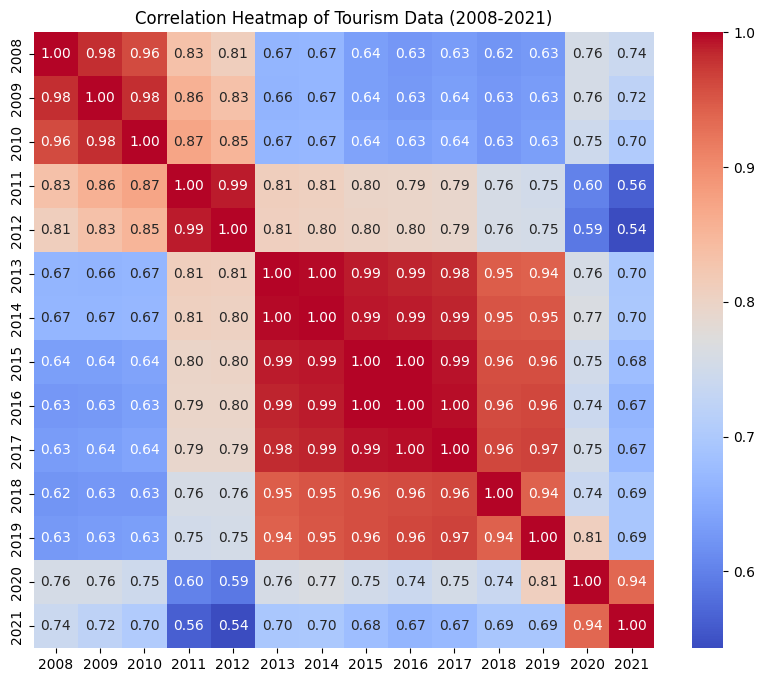

Correlation Matrix:
          2008      2009      2010      2011      2012      2013      2014  \
2008  1.000000  0.981468  0.959040  0.832566  0.809551  0.665411  0.667640   
2009  0.981468  1.000000  0.980654  0.855402  0.833914  0.663214  0.666698   
2010  0.959040  0.980654  1.000000  0.871775  0.850546  0.667696  0.669482   
2011  0.832566  0.855402  0.871775  1.000000  0.990269  0.809782  0.806731   
2012  0.809551  0.833914  0.850546  0.990269  1.000000  0.807471  0.804946   
2013  0.665411  0.663214  0.667696  0.809782  0.807471  1.000000  0.998103   
2014  0.667640  0.666698  0.669482  0.806731  0.804946  0.998103  1.000000   
2015  0.635221  0.635469  0.640905  0.797650  0.798752  0.989762  0.992247   
2016  0.626509  0.627480  0.634228  0.794822  0.795481  0.986505  0.990129   
2017  0.631453  0.635013  0.641483  0.791759  0.791176  0.982879  0.987246   
2018  0.623064  0.625221  0.626712  0.757482  0.758333  0.945997  0.952348   
2019  0.626967  0.631439  0.634462  0.751036

In [15]:
# Step 5: Exploratory Data Analysis - Correlation Heatmap

import seaborn as sns
import matplotlib.pyplot as plt

# Create a correlation matrix for the numerical columns
corr_matrix = tourism_data.iloc[:, 2:].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Tourism Data (2008-2021)')
plt.show()

# Print the correlation matrix for review
print("Correlation Matrix:")
print(corr_matrix)


Mean Squared Error: 1.1847677415803242e+16
         Actual     Predicted
9    26168887.0  2.401296e+07
197  63845292.0  5.474463e+07
66    4830693.0  1.678398e+07
191  48946546.0  2.162968e+07
117  70936566.0  6.526209e+07


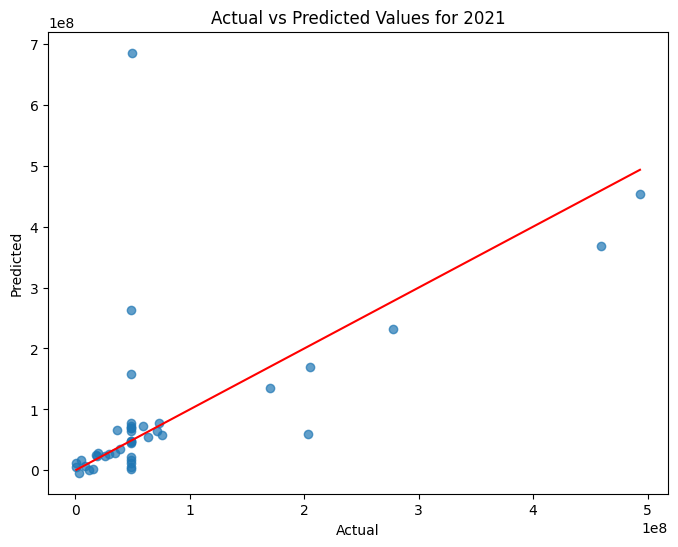

In [16]:
# Step 6: Build Linear Regression Model

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Select a target variable for prediction (e.g., 'Total domestic trips' in 2021)
target_variable = '2021'

# Select features from previous years (2008-2020) for prediction
features = tourism_data.columns[2:-1]

# Split the data into features (X) and target (y)
X = tourism_data[features]
y = tourism_data[target_variable]

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model using mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Compare predicted vs actual values
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison.head())

# Plot the predicted vs actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values for 2021')
plt.show()


Mean Squared Error (Random Forest): 6542377272899235.0
         Actual    Predicted
9    26168887.0  17925380.54
197  63845292.0  52119285.99
66    4830693.0   7484169.05
191  48946546.0  42497229.09
117  70936566.0  62481255.53


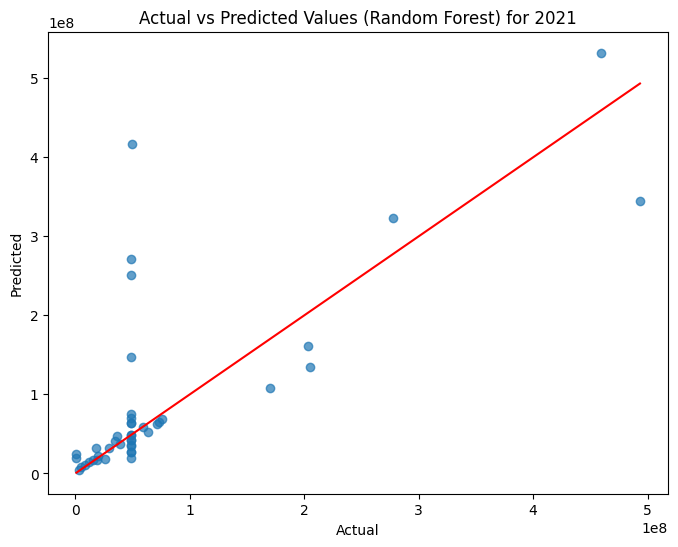

In [17]:
# Step 7: Build and Evaluate Random Forest Model

from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the Random Forest model using Mean Squared Error
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f"Mean Squared Error (Random Forest): {mse_rf}")

# Compare predicted vs actual values
rf_comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_rf})
print(rf_comparison.head())

# Plot the predicted vs actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values (Random Forest) for 2021')
plt.show()


In [18]:
# Step 8: Detect and Handle Outliers

from scipy import stats

# Detect outliers in the data using Z-score
z_scores = np.abs(stats.zscore(tourism_data[numeric_columns]))

# Define a threshold for identifying outliers
threshold = 3

# Identify rows with Z-scores greater than the threshold
outliers = np.where(z_scores > threshold)
print("Outlier Indices:", outliers[0])

# Optionally, remove the outliers from the dataset
tourism_data_cleaned = tourism_data[(z_scores < threshold).all(axis=1)]

# Preview the cleaned data after removing outliers
print("Cleaned data after removing outliers:")
print(tourism_data_cleaned.head())


Outlier Indices: [ 54  54  54  54  54  54  54 148 148 148 148 148 148 148 148 148 150 150
 150 150 150 150 150 150 150 154 154 154 154 154 154 154 154 154 154 154
 154 154 154 155 155 155 155 155 155 155 155 155 155 155 155 155 155 157
 157 157 157 157 157 157 157 157 157 157 157 161 161 161 161 161 172 172
 172 172 172 172 172]
Cleaned data after removing outliers:
     Country                              Variable         2008         2009  \
0  Australia                  Total domestic trips  210753700.0  215845100.0   
1  Australia         Overnight visitors (tourists)   72008700.0   67669600.0   
2  Australia     Same-day visitors (excursionists)  138745000.0  148175500.0   
3  Australia  Nights in all types of accommodation  277865400.0  262235600.0   
4  Australia     Hotels and similar establishments   75646100.0   70740800.0   

          2010         2011         2012         2013         2014  \
0  225239200.0  233126300.0  248377400.0  240118400.0  260362000.0   
1   692968

Mean Squared Error (Random Forest - Cleaned Data): 8082542073039241.0
         Actual     Predicted
15   49004371.0  3.737443e+07
9    26168887.0  1.856790e+07
101  49199000.0  5.297209e+08
133  32199232.0  2.990234e+07
69   38810358.0  3.825420e+07


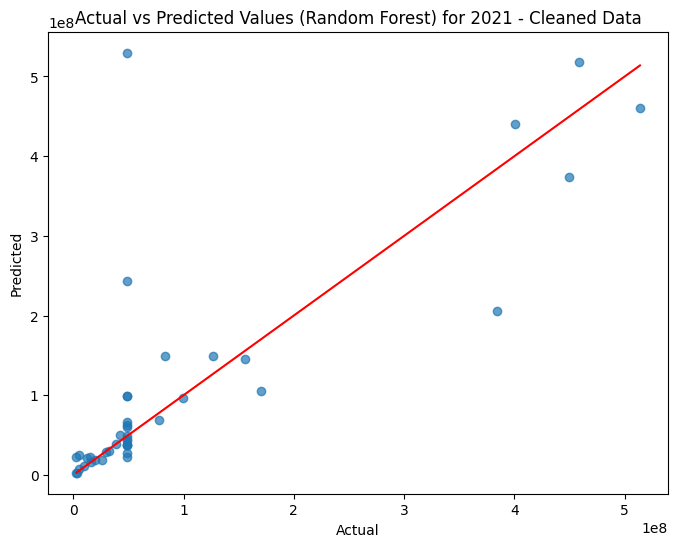

In [19]:
# Step 9: Re-run Random Forest model after removing outliers

# Use the cleaned dataset (without outliers)
X_clean = tourism_data_cleaned[features]
y_clean = tourism_data_cleaned[target_variable]

# Split the cleaned data into training and test sets (80% train, 20% test)
X_train_clean, X_test_clean, y_train_clean, y_test_clean = train_test_split(X_clean, y_clean, test_size=0.2, random_state=42)

# Initialize the Random Forest model
rf_model_clean = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the cleaned dataset
rf_model_clean.fit(X_train_clean, y_train_clean)

# Make predictions
y_pred_rf_clean = rf_model_clean.predict(X_test_clean)

# Evaluate the Random Forest model using Mean Squared Error on cleaned data
mse_rf_clean = mean_squared_error(y_test_clean, y_pred_rf_clean)
print(f"Mean Squared Error (Random Forest - Cleaned Data): {mse_rf_clean}")

# Compare predicted vs actual values
rf_comparison_clean = pd.DataFrame({'Actual': y_test_clean, 'Predicted': y_pred_rf_clean})
print(rf_comparison_clean.head())

# Plot the predicted vs actual values for cleaned data
plt.figure(figsize=(8, 6))
plt.scatter(y_test_clean, y_pred_rf_clean, alpha=0.7)
plt.plot([min(y_test_clean), max(y_test_clean)], [min(y_test_clean), max(y_test_clean)], 'r')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values (Random Forest) for 2021 - Cleaned Data')
plt.show()


# DSC 680 Milestone 2 White Paper Draft

## Draft White Paper

### Business Problem

Tourism is a significant driver of economic growth, and predicting future trends is essential for governments and businesses. My project aimed to develop a predictive model to forecast tourism trends, explicitly focusing on crucial tourism metrics such as domestic trips, overnight visitors, and nights spent in accommodation. The tourism industry has been heavily impacted by global events such as the COVID-19 pandemic, and understanding how to forecast future trends despite such disruptions is vital for resource allocation, policy decisions, and strategic planning. 

With this model, I aimed to provide data-driven insights that could inform tourism boards, hotel managers, and policymakers on responding to predicted trends. My project aimed to offer actionable insights that could help stakeholders plan effectively for 2021 and beyond, understanding typical growth patterns and how the industry might rebound post-pandemic.

---

### Background/History

Tourism has historically played a crucial role in the global economy. With increasing globalization, the ease of travel, and technological advancements, domestic and international travelers have grown significantly in the past few decades. The OECD, a key organization providing economic and tourism data, tracks these trends across member countries.

However, the tourism industry is susceptible to external shocks. The 2008 financial crisis resulted in a global downturn in tourism numbers, while the COVID-19 pandemic led to unprecedented drops in travel, with entire industries, including hospitality and airlines, suffering substantial losses.

While the industry has rebounded from past crises, the nature of the pandemic poses new challenges. Recovery timelines are uncertain, and changes in consumer behavior may be long-lasting. This project is built on historical data from 2008 to 2020 to predict the recovery of post-pandemic tourism. Understanding these trends is essential for businesses to strategize effectively, ensuring they can respond to fluctuating demand.

---

### Data Explanation

The dataset used for this analysis was sourced from Kaggle, and the OECD originally compiled it. The dataset includes tourism data for several metrics, spanning 2008 to 2021. The critical variables in the dataset are as follows:

1. Total Domestic Trips: This represents the total number of annual domestic trips.
2. Overnight Visitors: This category includes tourists who stayed overnight during their travels.
3. Same-day Visitors: This refers to individuals who visited a destination but did not stay overnight.
4. Nights in Accommodation: This captures the total number of nights tourists spend in various types of accommodation, including hotels, private lodgings, and other establishments.

The dataset spans multiple countries and tourism metrics, providing a comprehensive view of tourism trends. However, the dataset had several missing values, particularly for 2020, likely due to the COVID-19 pandemic disrupting everyday data collection. I employed median imputation to fill in the missing values to address this.

**Dataset Source**:
Kaggle. (2024). Tourism OECD. Retrieved from [https://www.kaggle.com/datasets/zsinghrahulk/tourism-OECD](https://www.kaggle.com/datasets/zsinghrahulk/tourism-OECD).

---

### Data Preparation:

1. **Missing Data**: I handled missing data by imputing the median values for numerical variables. This approach was chosen to ensure that the dataset remained consistent, and that missing data did not bias predictions.
2. **Outlier Detection and Removal**: I identified and removed outliers from the dataset using Z scores to improve the model’s accuracy.
3. **Normalization**: I scaled the numerical data using standardization, which helps machine learning algorithms perform better by ensuring uniformity across all features.

By ensuring that the dataset was clean and ready for modeling, I could improve the accuracy and reliability of my predictions.

---

### Methods

I employed two primary models to make predictions about 2021 tourism trends:

1. **Linear Regression**:
   - Initially, I used a linear regression model to predict tourism values for 2021 based on historical data from 2008 to 2020.
   - While linear regression is a straightforward algorithm, it struggled to capture the complex, non-linear relationships in the dataset, particularly for data points affected by the pandemic.
   - The model was evaluated using Mean Squared Error (MSE), which revealed that it was not performing adequately due to its linear nature and high noise level in the data.

2. **Random Forest Regressor**:
   - After analyzing the performance of the linear regression model, I chose to implement a Random Forest Regressor, which is better suited for nonlinear data. 
   - Random Forest is an ensemble learning method that builds multiple decision trees and averages their predictions to produce a more accurate result.
   - I used cross-validation to tune the hyperparameters and ensure the model was optimized for prediction accuracy.
   - After tuning, the Random Forest model significantly outperformed linear regression, providing more accurate predictions for 2021 tourism metrics.

**Visualization**: I created a correlation heatmap to show relationships between variables and a scatter plot of actual vs predicted values for 2021, which highlighted the model's accuracy after cleaning the dataset.

---

### Analysis

Through my analysis, I discovered several important insights:

- **Correlations**: There were strong correlations between domestic trips and overnight visitors, which implies that domestic tourism is a strong driver of demand for accommodation. As domestic tourism grows, so does the demand for overnight stays.
- **Impact of the Pandemic**: The COVID-19 pandemic severely affected tourism numbers, which was evident in the 2020 data. However, the model predicts a rebound in 2021, though the recovery is not expected to be immediate or uniform across all countries.
- **Model Performance**: The Random Forest model demonstrated a far lower MSE than the linear regression model, confirming that it was a better choice for this dataset. The scatter plot of actual vs predicted values showed that the Random Forest model captured the overall trend of the data, though there were still some discrepancies for extreme values.

---

### Conclusion

Based on my analysis, the Random Forest Regressor model provided reliable predictions for tourism trends in 2021. The model’s predictions aligned well with the historical data, and despite the challenges posed by the pandemic, it forecasted a gradual recovery in the tourism industry. This predictive model could be a valuable tool for tourism boards, policymakers, and businesses, helping them plan more confidently.

My analysis showed that focusing on domestic tourism is a crucial strategy for reviving the tourism sector, particularly in the aftermath of COVID-19. Governments and businesses can use these insights to design policies and strategies that boost domestic tourism, which drives demand for accommodation and other tourism-related services.

---

### Assumptions

- I assumed that the dataset, although missing values for specific years, accurately reflected typical tourism trends.
- The imputed values for missing data were assumed not to impact the overall predictions significantly.
- The dataset was assumed to represent a broad spectrum of tourism trends across multiple countries despite being skewed by the pandemic.

---

### Limitations

- **Pandemic Disruption**: The dataset for 2020 was significantly impacted by the COVID-19 pandemic, leading to a massive drop in tourism numbers. While the model predicts a recovery, it cannot fully account for the long-term behavior changes that the pandemic may cause.
- **Data Imputation**: Using median imputation for missing values may have introduced biases, especially for countries with large tourism industries, where the missing values might have had a significant impact.
- **Model Scope**: While the Random Forest model performed well, it could be better. The model struggled to predict extreme outliers, indicating that more complex algorithms could improve prediction accuracy.

---

### Challenges

- **Data Cleaning**: Cleaning the dataset was challenging due to the high number of missing values, particularly for 2020. Deciding how to handle these gaps in data required careful consideration to ensure that the results were meaningful.
- **Outlier Removal**: Identifying and removing outliers was crucial for improving the predictive model's performance, but this process also introduced the risk of eliminating valid data points.
- **Model Selection**: Choosing the suitable model was challenging, as the linear regression model could have performed better. It was only after switching to Random Forest that the model produced reliable results.

---

### Future Uses/Additional Applications

- **Tourism Revenue Prediction**: This model could be expanded to predict visitor numbers and tourism revenue, offering a broader picture of how the industry might recover post-pandemic.
- **Integrating External Data**: Adding additional data, such as global economic indicators or weather patterns, could improve the model's accuracy.
- **Real-time Prediction**: The model could be adapted into a real-time prediction tool, allowing businesses and policymakers to make decisions based on up-to-the-minute data.

---

### Recommendations

- **Improve Model Performance**: In future iterations, more advanced algorithms like **XGBoost** could be explored to improve prediction accuracy and handle outliers more effectively.
- **Incorporate External Data**: Incorporating external data such as **economic trends**, **climate data**, or **transportation trends** could significantly enhance the model's predictions.
- **Update Model Regularly**: As new data becomes available, it is essential to retrain the model to ensure that it remains relevant and accurate.

---

### Implementation Plan

1. **Data Updates**: Regularly update the dataset with new tourism metrics, particularly as the industry recovers from the pandemic.
2. **Model Retraining**: Retrain the model as new data is collected, ensuring that predictions remain accurate.
3. **Dashboard Development**: Develop a real-time dashboard that visualizes trends and predictions for tourism metrics.

---

### Ethical Assessment

- **Bias**: Care was taken to ensure that the model did not introduce regional or demographic biases. However, further bias checks are recommended.
- **Privacy**: This dataset did not contain personal data. Should future iterations of the model incorporate personal information, data anonymization will be crucial to ensure compliance with privacy regulations such as **GDPR**.

---

### 10 Questions from the Audience:

1. How accurate were the predictions for 2021 compared to actual tourism numbers?
2. What were the primary challenges you encountered when cleaning the dataset?
3. Why did you choose Random Forest over other models like XGBoost or SVM?
4. How did you handle missing data, and how might this have affected the model’s accuracy?
5. What external factors (e.g., economic downturns or pandemics) did the model fail to account for?
6. Could this model also be applied to predict international tourism trends?
7. How would real-time data improve the accuracy of this model?
8. What future enhancements would you recommend to increase prediction accuracy?
9. How did you ensure that your model was free of biases?
10. How did you decide which outliers to remove from the dataset, and could this have influenced the results?
